In [26]:
setwd('~/Downloads/proj/')

library(data.table)
library(edgeR)
library(EDASeq)
library(RUVSeq)
library(affycoretools)
library(ggplot2)
library(DESeq2)
library(pheatmap)
require(dplyr)
require(stringr)

#project directories, and libraries loaded

MM_cell_line = data.frame(fread("HMCL66_HTSeq_GENE_Counts_v2.txt"))
MM_patients = data.frame(fread("MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.txt"))

#reading and creating data frames from gene count data

head(MM_cell_line)
head(MM_patients)
length(MM_patients[2,])

#checking output head

Sample          GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8
1 ENSG00000000003 TSPAN6       2            0          100        
2 ENSG00000000005 TNMD         1            0            0        
3 ENSG00000000419 DPM1      3949         4134         4795        
4 ENSG00000000457 SCYL3     1597         1513         2412        
5 ENSG00000000460 C1orf112  3072         1488         2193        
6 ENSG00000000938 FGR          0           22          701        
  ANBL6_DJ2_p13 COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9 ⋯
1    2             0               0                2        88        ⋯
2    0             1               0                0         0        ⋯
3 8278          2262            2587             3607      2450        ⋯
4 1988          1530             926             1415       573        ⋯
5 4091          3208            1170             3614      1618        ⋯
6    5             2               4               89         4        ⋯
  RPMI8226_ATCC_p7 SKMM1_p6 SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5
1    2                0        0              0            0        0     
2    0                1        0              0            0        0     
3 2694             1247     3263           3044         3108     4538     
4  665              994      497           1611         1603     1375     
5 1472             1517     1346           2068         3128     1850     
6    0              125      777             50         1890     2315     
  XG1_p5 XG2_p5 XG6_p5 XG7_p6
1    0      0      2     114 
2    0      0      0       0 
3 7336   4430   9279   13828 
4 1426    893   1540    1660 
5 2522   2320    793     689 
6 1514      5   3776     847

GENE_ID         MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
1 ENSG00000000003   17            999             85              9          
2 ENSG00000000005    1              0              0              2          
3 ENSG00000000419 1495           3271           2303           1234          
4 ENSG00000000457  231            809            203           1208          
5 ENSG00000000460   87            319             31            183          
6 ENSG00000000938  318            105            119            190          
  MMRF_2461_1_BM MMRF_2531_2_PB MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2089_2_BM ⋯
1  801             20             12             16              4           ⋯
2    3              0              0              0              0           ⋯
3 1896           4400           2013           1745           1698           ⋯
4  425           2793            710            922            853           ⋯
5   85            929            174            292            837           ⋯
6 2064           2952             12            351            498           ⋯
  MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_1978_2_BM MMRF_2795_1_BM
1    2            186           102             347            128          
2    0              0             0               0              0          
3 2459           1269           337            3347           1049          
4  734            771           327             392             90          
5  267            104           114             126             17          
6   46             14           303            2007             58          
  MMRF_2316_1_BM MMRF_2606_2_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
1   17             11              3             18             6           
2    0              1              0              0             0           
3 2545           1625           1253           1905           683           
4  406            857            548            808           393           
5   67            196            141            199            55           
6   77           1037             11            174            22

[1] 893

In [27]:
ensembl_intersect = intersect(MM_cell_line$Sample, MM_patients$GENE_ID)

#finding genes in common and creating character vector of Ensembl Gene IDs

head(ensembl_intersect)

#checking output head

[1] "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457"
[5] "ENSG00000000460" "ENSG00000000938"

In [28]:
rownames(MM_cell_line) = MM_cell_line$Sample
rownames(MM_patients) = MM_patients$GENE_ID

#assigning rownames as ensembl gene IDs so as to be able to parse by ensembl Gene IDs

head(MM_cell_line)
head(MM_patients)

#checking output head

Sample          GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11
ENSG00000000003 ENSG00000000003 TSPAN6       2            0        
ENSG00000000005 ENSG00000000005 TNMD         1            0        
ENSG00000000419 ENSG00000000419 DPM1      3949         4134        
ENSG00000000457 ENSG00000000457 SCYL3     1597         1513        
ENSG00000000460 ENSG00000000460 C1orf112  3072         1488        
ENSG00000000938 ENSG00000000938 FGR          0           22        
                AMO1_DSMZ_p8 ANBL6_DJ2_p13 COLO677_DSMZ_p8 Delta47_JCRB_p16
ENSG00000000003  100            2             0               0            
ENSG00000000005    0            0             1               0            
ENSG00000000419 4795         8278          2262            2587            
ENSG00000000457 2412         1988          1530             926            
ENSG00000000460 2193         4091          3208            1170            
ENSG00000000938  701            5             2               4            
                DP6_DJ_p7 EJM_DSMZ_p9 ⋯ RPMI8226_ATCC_p7 SKMM1_p6
ENSG00000000003    2        88        ⋯    2                0    
ENSG00000000005    0         0        ⋯    0                1    
ENSG00000000419 3607      2450        ⋯ 2694             1247    
ENSG00000000457 1415       573        ⋯  665              994    
ENSG00000000460 3614      1618        ⋯ 1472             1517    
ENSG00000000938   89         4        ⋯    0              125    
                SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5
ENSG00000000003    0              0            0        0         0      0  
ENSG00000000005    0              0            0        0         0      0  
ENSG00000000419 3263           3044         3108     4538      7336   4430  
ENSG00000000457  497           1611         1603     1375      1426    893  
ENSG00000000460 1346           2068         3128     1850      2522   2320  
ENSG00000000938  777             50         1890     2315      1514      5  
                XG6_p5 XG7_p6
ENSG00000000003    2     114 
ENSG00000000005    0       0 
ENSG00000000419 9279   13828 
ENSG00000000457 1540    1660 
ENSG00000000460  793     689 
ENSG00000000938 3776     847

GENE_ID         MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM
ENSG00000000003 ENSG00000000003   17            999             85          
ENSG00000000005 ENSG00000000005    1              0              0          
ENSG00000000419 ENSG00000000419 1495           3271           2303          
ENSG00000000457 ENSG00000000457  231            809            203          
ENSG00000000460 ENSG00000000460   87            319             31          
ENSG00000000938 ENSG00000000938  318            105            119          
                MMRF_1656_1_BM MMRF_2461_1_BM MMRF_2531_2_PB MMRF_2057_1_BM
ENSG00000000003    9            801             20             12          
ENSG00000000005    2              3              0              0          
ENSG00000000419 1234           1896           4400           2013          
ENSG00000000457 1208            425           2793            710          
ENSG00000000460  183             85            929            174          
ENSG00000000938  190           2064           2952             12          
                MMRF_1910_1_BM MMRF_2089_2_BM ⋯ MMRF_2379_1_BM MMRF_1474_1_BM
ENSG00000000003   16              4           ⋯    2            186          
ENSG00000000005    0              0           ⋯    0              0          
ENSG00000000419 1745           1698           ⋯ 2459           1269          
ENSG00000000457  922            853           ⋯  734            771          
ENSG00000000460  292            837           ⋯  267            104          
ENSG00000000938  351            498           ⋯   46             14          
                MMRF_1641_1_BM MMRF_1978_2_BM MMRF_2795_1_BM MMRF_2316_1_BM
ENSG00000000003 102             347            128             17          
ENSG00000000005   0               0              0              0          
ENSG00000000419 337            3347           1049           2545          
ENSG00000000457 327             392             90            406          
ENSG00000000460 114             126             17             67          
ENSG00000000938 303            2007             58             77          
                MMRF_2606_2_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003   11              3             18             6           
ENSG00000000005    1              0              0             0           
ENSG00000000419 1625           1253           1905           683           
ENSG00000000457  857            548            808           393           
ENSG00000000460  196            141            199            55           
ENSG00000000938 1037             11            174            22

In [29]:
MM_cell_line = MM_cell_line[ensembl_intersect, -1]
MM_patients = MM_patients[ensembl_intersect, -1]

MM_patient_ids = data.frame(colnames(MM_patients))
MM_patients_new = filter(MM_patient_ids, str_extract(MM_patient_ids[,1], "_[0-9]_") == "_1_")
keepc = colnames(MM_patients) %in% MM_patients_new[,1]
MM_patients = MM_patients[,keepc]

MM_combined = cbind(MM_cell_line, MM_patients)

#filtering MM_cell_line and MM_patients to only those genes in common and taking out 
    #Gene name and ensembl ID columns, then combining them

head(MM_cell_line)
head(MM_patients)
head(MM_combined)
length(MM_patients[2,])
#checking output head

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000005 TNMD         1            0            0            0         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000005    1               0                0         0       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
                FLAM76_JCRB_p10 ⋯ RPMI8226_ATCC_p7 SKMM1_p6 SKMM2_DSMZ_p17
ENSG00000000003    4            ⋯    2                0        0          
ENSG00000000005    0            ⋯    0                1        0          
ENSG00000000419 1388            ⋯ 2694             1247     3263          
ENSG00000000457 1013            ⋯  665              994      497          
ENSG00000000460 1507            ⋯ 1472             1517     1346          
ENSG00000000938    2            ⋯    0              125      777          
                U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5 XG6_p5 XG7_p6
ENSG00000000003    0            0        0         0      0      2     114 
ENSG00000000005    0            0        0         0      0      0       0 
ENSG00000000419 3044         3108     4538      7336   4430   9279   13828 
ENSG00000000457 1611         1603     1375      1426    893   1540    1660 
ENSG00000000460 2068         3128     1850      2522   2320    793     689 
ENSG00000000938   50         1890     2315      1514      5   3776     847

MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
ENSG00000000003   17            999             85              9          
ENSG00000000005    1              0              0              2          
ENSG00000000419 1495           3271           2303           1234          
ENSG00000000457  231            809            203           1208          
ENSG00000000460   87            319             31            183          
ENSG00000000938  318            105            119            190          
                MMRF_2461_1_BM MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2341_1_BM
ENSG00000000003  801             12             16             43          
ENSG00000000005    3              0              0              1          
ENSG00000000419 1896           2013           1745           2403          
ENSG00000000457  425            710            922           1203          
ENSG00000000460   85            174            292            478          
ENSG00000000938 2064             12            351            555          
                MMRF_2501_1_BM MMRF_1383_1_BM ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003  594           693            ⋯    1             49          
ENSG00000000005    0             0            ⋯    0              0          
ENSG00000000419 1847           973            ⋯ 1751           2537          
ENSG00000000457 1160           587            ⋯  493            220          
ENSG00000000460  218           107            ⋯  104             50          
ENSG00000000938   37            21            ⋯ 3064             46          
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003    2            186           102             128          
ENSG00000000005    0              0             0               0          
ENSG00000000419 2459           1269           337            1049          
ENSG00000000457  734            771           327              90          
ENSG00000000460  267            104           114              17          
ENSG00000000938   46             14           303              58          
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003   17              3             18             6           
ENSG00000000005    0              0              0             0           
ENSG00000000419 2545           1253           1905           683           
ENSG00000000457  406            548            808           393           
ENSG00000000460   67            141            199            55           
ENSG00000000938   77             11            174            22

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000005 TNMD         1            0            0            0         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000005    1               0                0         0       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
                FLAM76_JCRB_p10 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM MMRF_2379_1_BM
ENSG00000000003    4            ⋯    1             49              2          
ENSG00000000005    0            ⋯    0              0              0          
ENSG00000000419 1388            ⋯ 1751           2537           2459          
ENSG00000000457 1013            ⋯  493            220            734          
ENSG00000000460 1507            ⋯  104             50            267          
ENSG00000000938    2            ⋯ 3064             46             46          
                MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM MMRF_2316_1_BM
ENSG00000000003  186           102             128             17          
ENSG00000000005    0             0               0              0          
ENSG00000000419 1269           337            1049           2545          
ENSG00000000457  771           327              90            406          
ENSG00000000460  104           114              17             67          
ENSG00000000938   14           303              58             77          
                MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003    3             18             6           
ENSG00000000005    0              0             0           
ENSG00000000419 1253           1905           683           
ENSG00000000457  548            808           393           
ENSG00000000460  141            199            55           
ENSG00000000938   11            174            22

[1] 779

In [30]:
MM_cell_line_cpm = cpm(MM_cell_line[,-1])
MM_patients_cpm = cpm(MM_patients)

#getting counts per million for MM_cell_line, and MM_patients_cpm

head(MM_cell_line_cpm)
head(MM_patients_cpm)

#checking output head

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003  0.02834975   0.0000000    1.622395     0.02336384  
ENSG00000000005  0.01417488   0.0000000    0.000000     0.00000000  
ENSG00000000419 55.97658401  51.2687903   77.793863    96.70295153  
ENSG00000000457 22.63727644  18.7638316   39.132179    23.22366123  
ENSG00000000460 43.54521805  18.4537881   35.579133    47.79074350  
ENSG00000000938  0.00000000   0.2728383   11.372992     0.05840961  
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7   EJM_DSMZ_p9
ENSG00000000003  0.00000000      0.00000000       0.02991395  1.84606143
ENSG00000000005  0.01371330      0.00000000       0.00000000  0.00000000
ENSG00000000419 31.01947819     46.41255860      53.94981686 51.39602836
ENSG00000000457 20.98134466     16.61307664      21.16412278 12.02037725
ENSG00000000460 43.99225731     20.99060439      54.05451570 33.94235669
ENSG00000000938  0.02742659      0.07176275       1.33117097  0.08391188
                FLAM76_JCRB_p10 FR4_p6   ⋯ RPMI8226_ATCC_p7 SKMM1_p6   
ENSG00000000003  0.08252468      0.00000 ⋯  0.04066095       0.00000000
ENSG00000000005  0.00000000      0.00000 ⋯  0.00000000       0.02448497
ENSG00000000419 28.63606308     90.65327 ⋯ 54.77030556      30.53276243
ENSG00000000457 20.89937457     33.76204 ⋯ 13.51976733      24.33806403
ENSG00000000460 31.09117223     40.85974 ⋯ 29.92646243      37.14370537
ENSG00000000938  0.04126234     62.23506 ⋯  0.00000000       3.06062173
                SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5   
ENSG00000000003  0.000000       0.000000     0.00000  0.00000    0.00000
ENSG00000000005  0.000000       0.000000     0.00000  0.00000    0.00000
ENSG00000000419 65.452450      53.700359    41.32766 65.86048  109.42511
ENSG00000000457  9.969313      28.420262    21.31539 19.95552   21.27047
ENSG00000000460 26.999386      36.482372    41.59361 26.84925   37.61861
ENSG00000000938 15.585827       0.882069    25.13169 33.59784   22.58310
                XG2_p5      XG6_p5       XG7_p6    
ENSG00000000003  0.00000000   0.03073836   1.460413
ENSG00000000005  0.00000000   0.00000000   0.000000
ENSG00000000419 58.79794048 142.61060806 177.145577
ENSG00000000457 11.85249681  23.66853502  21.265668
ENSG00000000460 30.79260088  12.18775862   8.826533
ENSG00000000938  0.06636336  58.03401832  10.850615

MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
ENSG00000000003  0.41571843    15.194298       1.9975817      0.18506125   
ENSG00000000005  0.02445403     0.000000       0.0000000      0.04112472   
ENSG00000000419 36.55876793    49.750299      54.1227124     25.37395378   
ENSG00000000457  5.64887986    12.304492       4.7706950     24.83933239   
ENSG00000000460  2.12750021     4.851833       0.7285298      3.76291211   
ENSG00000000938  7.77638007     1.596998       2.7966143      3.90684864   
                MMRF_2461_1_BM MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2341_1_BM
ENSG00000000003  9.58358567     0.2422773      0.2571051      0.57555389   
ENSG00000000005  0.03589358     0.0000000      0.0000000      0.01338497   
ENSG00000000419 22.68474210    40.6420105     28.0405222     32.16409293   
ENSG00000000457  5.08492373    14.3347379     14.8156799     16.10212393   
ENSG00000000460  1.01698475     3.5130203      4.6921676      6.39801765   
ENSG00000000938 24.69478254     0.2422773      5.6402426      7.42866066   
                MMRF_2501_1_BM MMRF_1383_1_BM ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003  7.5451838     20.2371987     ⋯  0.02036196     0.8435951    
ENSG00000000005  0.0000000      0.0000000     ⋯  0.00000000     0.0000000    
ENSG00000000419 23.4612029     28.4138446     ⋯ 35.65378598    43.6775686    
ENSG00000000457 14.7347024     17.1417541     ⋯ 10.03844460     3.7875700    
ENSG00000000460  2.7691079      3.1246468     ⋯  2.11764348     0.8608114    
ENSG00000000938  0.4699862      0.6132484     ⋯ 62.38903497     0.7919465    
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003  0.02949247     3.1089737     2.013385        2.8256961    
ENSG00000000005  0.00000000     0.0000000     0.000000        0.0000000    
ENSG00000000419 36.26098596    21.2112241     6.652067       23.1574629    
ENSG00000000457 10.82373473    12.8871976     6.454676        1.9868176    
ENSG00000000460  3.93724410     1.7383509     2.250254        0.3752878    
ENSG00000000938  0.67832670     0.2340088     5.980938        1.2803936    
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003  0.2622789      0.05961647     0.2925792      0.1861177    
ENSG00000000005  0.0000000      0.00000000     0.0000000      0.0000000    
ENSG00000000419 39.2646952     24.89981253    30.9646322     21.1863986    
ENSG00000000457  6.2638374     10.88994195    13.1335553     12.1907096    
ENSG00000000460  1.0336875      2.80197412     3.2346256      1.7060790    
ENSG00000000938  1.1879692      0.21859373     2.8282656      0.6824316

In [31]:
keep = rowSums(cpm(MM_combined[-1]) > 1) > 2
MM_combined.filtered = MM_combined[keep, ]
MM_patients_cpm = MM_patients_cpm[keep, ]


#initial filtering of MM_combined to remove low count genes (genes with greater than 
    #1 million counts in more than 2 samples are kept)

head(keep)
head(MM_combined.filtered)

#checking output head

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
           TRUE           FALSE            TRUE            TRUE            TRUE 
ENSG00000000938 
           TRUE

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
ENSG00000000971 CFH         11          207           24           21         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
ENSG00000000971   18               8              685        12       
                FLAM76_JCRB_p10 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM MMRF_2379_1_BM
ENSG00000000003    4            ⋯    1             49              2          
ENSG00000000419 1388            ⋯ 1751           2537           2459          
ENSG00000000457 1013            ⋯  493            220            734          
ENSG00000000460 1507            ⋯  104             50            267          
ENSG00000000938    2            ⋯ 3064             46             46          
ENSG00000000971   28            ⋯ 2566             27             13          
                MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM MMRF_2316_1_BM
ENSG00000000003  186           102             128             17          
ENSG00000000419 1269           337            1049           2545          
ENSG00000000457  771           327              90            406          
ENSG00000000460  104           114              17             67          
ENSG00000000938   14           303              58             77          
ENSG00000000971    5            28              30             18          
                MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003    3             18             6           
ENSG00000000419 1253           1905           683           
ENSG00000000457  548            808           393           
ENSG00000000460  141            199            55           
ENSG00000000938   11            174            22           
ENSG00000000971 1680             56            10

In [32]:
MM_gene_names = MM_combined.filtered[, 1]
MM_combined.filtered = MM_combined.filtered[, -1]

#grabbing first colunmn of MM_combined.filtered (Gene_name), only those rows specified by ensembl intersect, 
    #removing Gene_name column from MM_combined.filtered

head(MM_gene_names)
head(MM_combined.filtered)

[1] "TSPAN6"   "DPM1"     "SCYL3"    "C1orf112" "FGR"      "CFH"

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003    2            0          100            2         
ENSG00000000419 3949         4134         4795         8278         
ENSG00000000457 1597         1513         2412         1988         
ENSG00000000460 3072         1488         2193         4091         
ENSG00000000938    0           22          701            5         
ENSG00000000971   11          207           24           21         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
ENSG00000000971   18               8              685        12       
                FLAM76_JCRB_p10 FR4_p6 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003    4               0   ⋯    1             49          
ENSG00000000419 1388            3308   ⋯ 1751           2537          
ENSG00000000457 1013            1232   ⋯  493            220          
ENSG00000000460 1507            1491   ⋯  104             50          
ENSG00000000938    2            2271   ⋯ 3064             46          
ENSG00000000971   28               2   ⋯ 2566             27          
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003    2            186           102             128          
ENSG00000000419 2459           1269           337            1049          
ENSG00000000457  734            771           327              90          
ENSG00000000460  267            104           114              17          
ENSG00000000938   46             14           303              58          
ENSG00000000971   13              5            28              30          
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003   17              3             18             6           
ENSG00000000419 2545           1253           1905           683           
ENSG00000000457  406            548            808           393           
ENSG00000000460   67            141            199            55           
ENSG00000000938   77             11            174            22           
ENSG00000000971   18           1680             56            10

In [33]:
combined_annot = data.frame(colnames(MM_combined.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

#utilizing varaince stabilization normalization method, vst(), then creating new seqExpressionSet object, 
    #using normalized counts

In [34]:
keepi = apply(MM_patients_cpm, 1, IQR)

keepis = sort(keepi, decreasing = TRUE)

keepi = keepi %in% keepis[3:5000]
sum(keepi)

MM_combined.filtered = MM_combined.filtered[keepi, ]

head(MM_combined.filtered)

[1] 4998

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000001036  157         2238         5620          4786        
ENSG00000001167 4072         4599         5967          3929        
ENSG00000001461 3219         7702         5276          6154        
ENSG00000001497 6102         4894         4204          6809        
ENSG00000001561 4226         4260         2735          1179        
ENSG00000001629 7506         7626         5787         12231        
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000001036 7363            2392              8351     2484       
ENSG00000001167 4719            1904              3588     1723       
ENSG00000001461 3652            3768              4191     4368       
ENSG00000001497 9480            2995              5036     2438       
ENSG00000001561  721            1472              4159      980       
ENSG00000001629 8093            2304             10061     5778       
                FLAM76_JCRB_p10 FR4_p6 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000001036 1835            3398   ⋯ 2079           1843          
ENSG00000001167 2638            2690   ⋯ 1594            618          
ENSG00000001461 4302            1346   ⋯ 1779            396          
ENSG00000001497 4184            6052   ⋯ 1941           2018          
ENSG00000001561 1475             573   ⋯  472            399          
ENSG00000001629 5149            2275   ⋯ 1936           1483          
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000001036 5195            911            548           1305          
ENSG00000001167 2008           2422            949            406          
ENSG00000001461 3055           3365           1389            160          
ENSG00000001497 1806           2113           3076           1163          
ENSG00000001561 4997            804            136            197          
ENSG00000001629 3710           4631           1900            991          
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000001036 4679           1419            695            701          
ENSG00000001167 1361           2132           2587            891          
ENSG00000001461  640           2322           2107            715          
ENSG00000001497 1580           1892           2624            765          
ENSG00000001561 1055           1358           1394            717          
ENSG00000001629 1887           3401           6707           1122

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

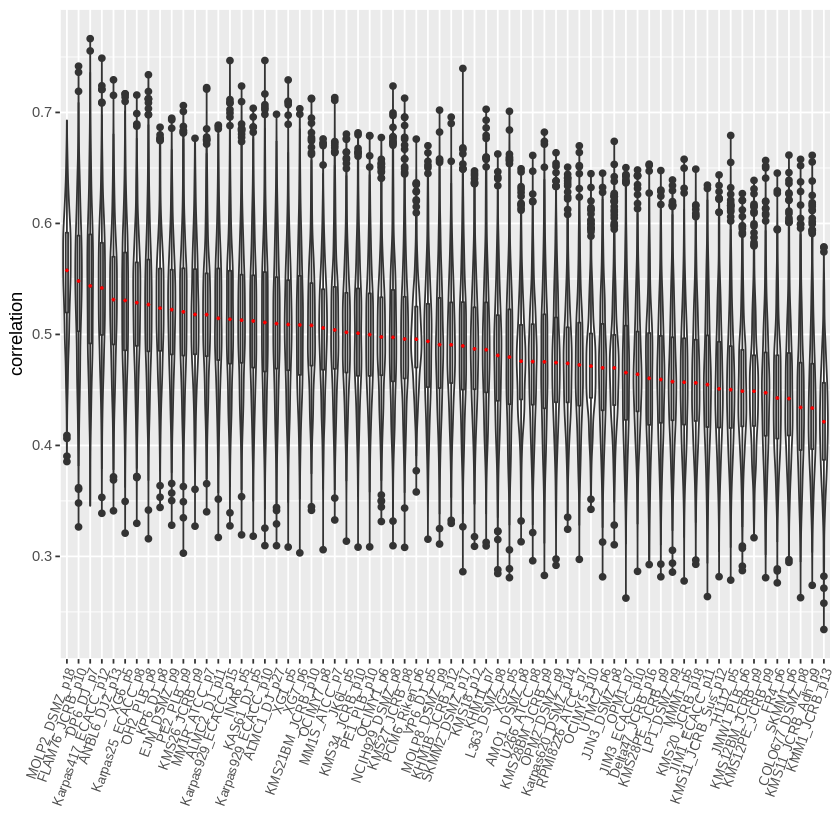

In [35]:
###### BASE ANALYSIS WITH ALL CELL LINES AND ALL NEWLY DIAGNOSED PATIENTS AND TOP 5000 GENES #####
setv = vst(as.matrix(round(MM_combined.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

In [36]:
#### DATA FOR TRANSLOCATIONS ####

MM_patients_trans = data.frame(fread("IA13a.structural.variants.annot.translocations.clean.maxHom0.8.minMap0.2.clonality.readRange10000bp.cnvRange2000bp.common.txt"))
MM_patient_trans_ids = MM_patients_trans[,'sample']

[1] 158

converting counts to integer mode
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

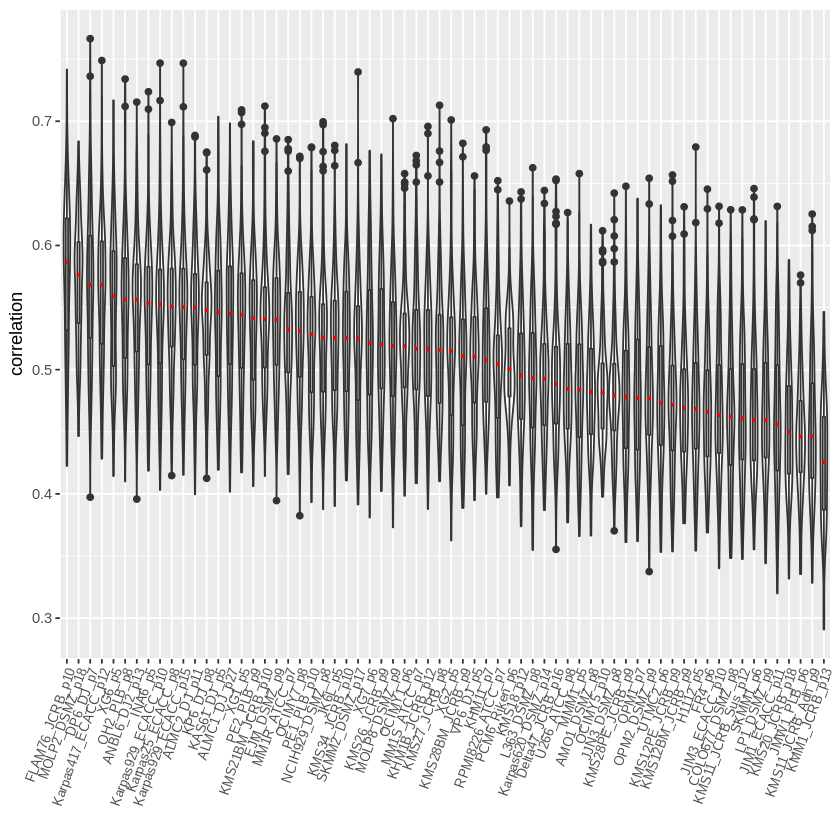

In [37]:
#### MYC translocation #####

keepMYC = as.logical(MM_patients_trans[,'t.MYC.'])
MM_patients_trans_MYC = MM_patient_trans_ids[keepMYC]
MM_patients_trans_MYC = unique(MM_patients_trans_MYC)
MM_patients_new_trans_MYC = filter(as.data.frame(MM_patients_trans_MYC),
                                   str_extract(as.data.frame(MM_patients_trans_MYC)[,1], "_[0-9]_") == "_1_")
keepcMYC = colnames(MM_patients) %in% MM_patients_new_trans_MYC[,1]
sum(keepcMYC)
MM_patients_MYC = MM_patients[,keepcMYC]
MM_combined_MYC = cbind(MM_cell_line, MM_patients_MYC)
MM_combined_MYC.filtered = MM_combined_MYC[keep, ]
MM_combined_MYC.filtered = MM_combined_MYC.filtered[keepi, ]
MM_combined_MYC.filtered = MM_combined_MYC.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_MYC.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_MYC.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_MYC)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 71

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

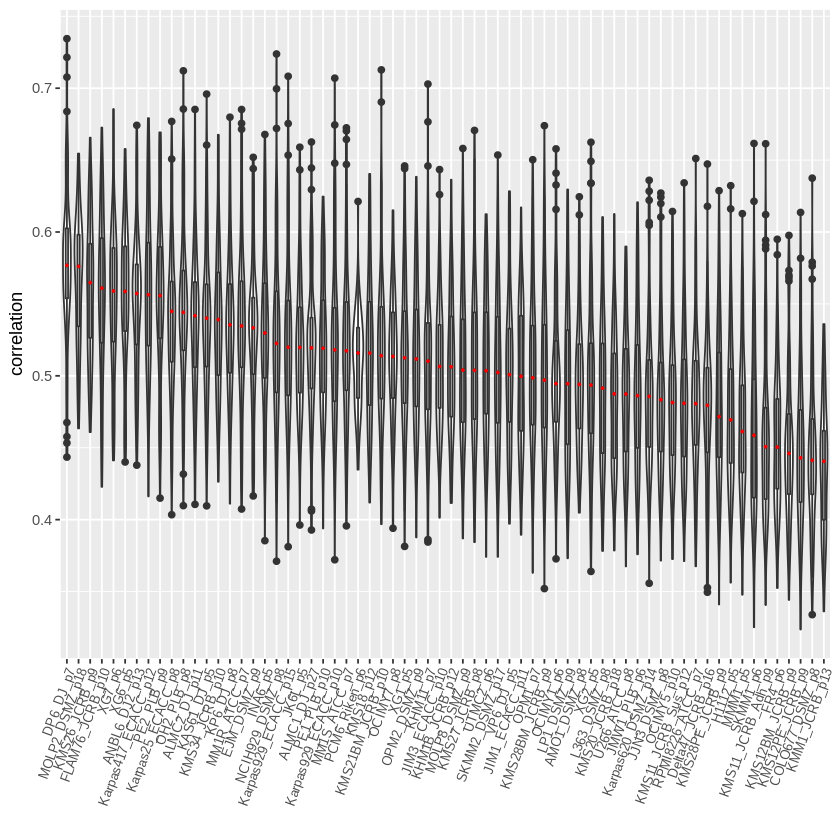

In [38]:
### translocation 4:14 ####

keep414 = as.logical(MM_patients_trans[,'t.4.14.'])
MM_patients_trans_414 = MM_patient_trans_ids[keep414]
MM_patients_trans_414 = unique(MM_patients_trans_414)
MM_patients_new_trans_414 = filter(as.data.frame(MM_patients_trans_414),
                                   str_extract(as.data.frame(MM_patients_trans_414)[,1], "_[0-9]_") == "_1_")
keepc414 = colnames(MM_patients) %in% MM_patients_new_trans_414[,1]
sum(keepc414)
MM_patients_414 = MM_patients[,keepc414]
MM_combined_414 = cbind(MM_cell_line, MM_patients_414)
MM_combined_414.filtered = MM_combined_414[keep, ]
MM_combined_414.filtered = MM_combined_414.filtered[keepi, ]
MM_combined_414.filtered = MM_combined_414.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_414.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_414.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_414)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 109

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

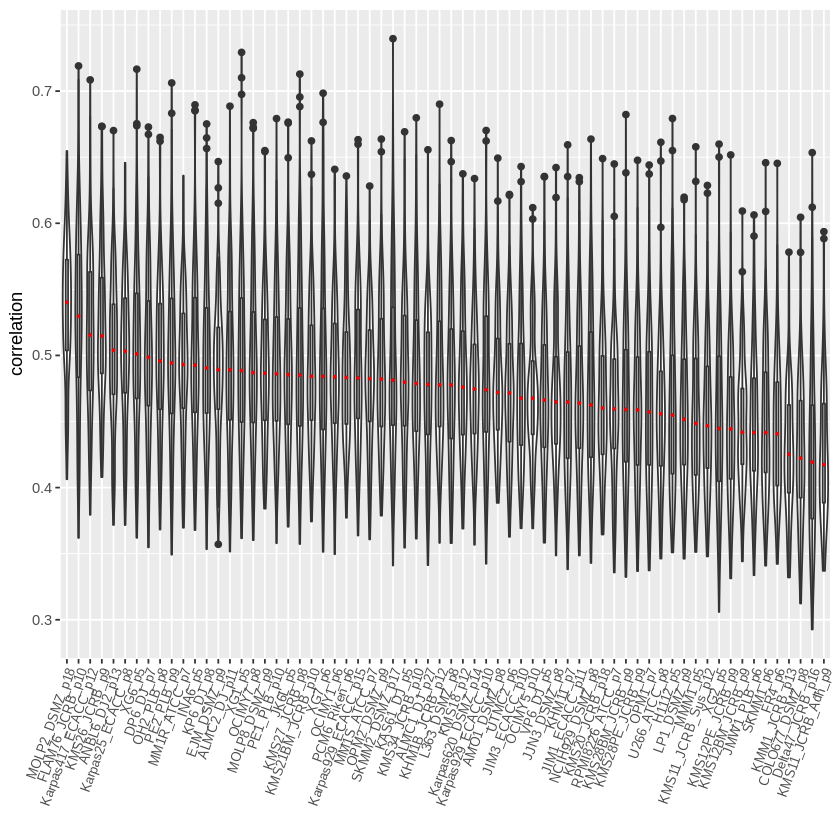

In [39]:
#### translocation 11:14 ######

keep1114 = as.logical(MM_patients_trans[,'t.11.14.'])
MM_patients_trans_1114 = MM_patient_trans_ids[keep1114]
MM_patients_trans_1114 = unique(MM_patients_trans_1114)
MM_patients_new_trans_1114 = filter(as.data.frame(MM_patients_trans_1114),
                                   str_extract(as.data.frame(MM_patients_trans_1114)[,1], "_[0-9]_") == "_1_")
keepc1114 = colnames(MM_patients) %in% MM_patients_new_trans_1114[,1]
sum(keepc1114)
MM_patients_1114 = MM_patients[,keepc1114]
MM_combined_1114 = cbind(MM_cell_line, MM_patients_1114)
MM_combined_1114.filtered = MM_combined_1114[keep, ]
MM_combined_1114.filtered = MM_combined_1114.filtered[keepi, ]
MM_combined_1114.filtered = MM_combined_1114.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1114.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_1114.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1114)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 27

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

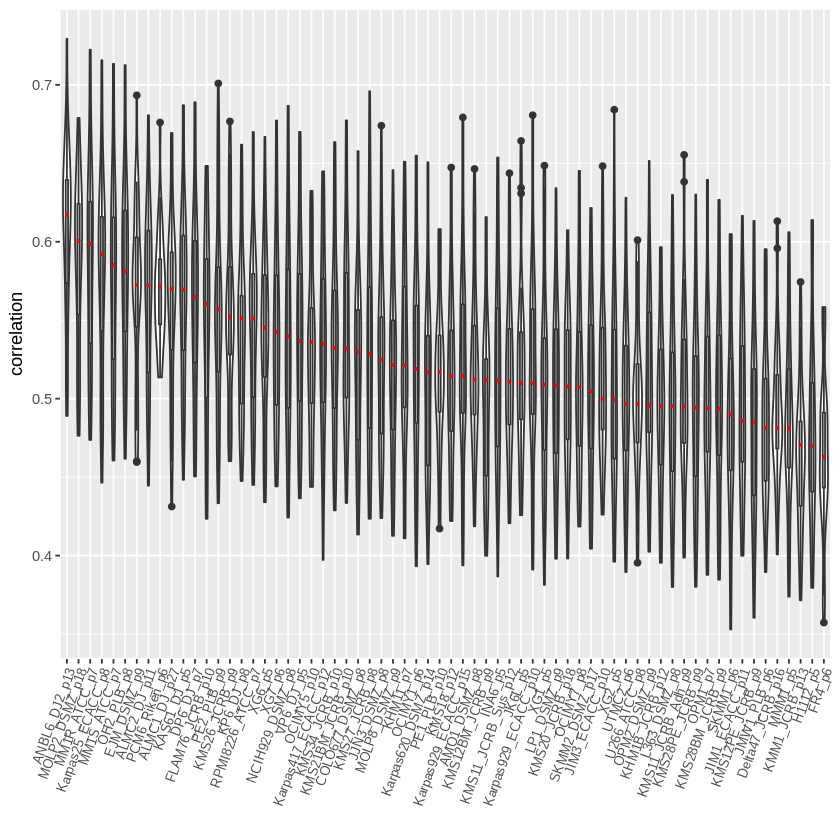

In [40]:
#### translocation 14:16 ######

keep1416 = as.logical(MM_patients_trans[,'t.14.16.'])
MM_patients_trans_1416 = MM_patient_trans_ids[keep1416]
MM_patients_trans_1416 = unique(MM_patients_trans_1416)
MM_patients_new_trans_1416 = filter(as.data.frame(MM_patients_trans_1416),
                                   str_extract(as.data.frame(MM_patients_trans_1416)[,1], "_[0-9]_") == "_1_")
keepc1416 = colnames(MM_patients) %in% MM_patients_new_trans_1416[,1]
sum(keepc1416)
MM_patients_1416 = MM_patients[,keepc1416]
MM_combined_1416 = cbind(MM_cell_line, MM_patients_1416)
MM_combined_1416.filtered = MM_combined_1416[keep, ]
MM_combined_1416.filtered = MM_combined_1416.filtered[keepi, ]
MM_combined_1416.filtered = MM_combined_1416.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1416.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_1416.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1416)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

In [41]:
#### Cell line info ####

MM_pat_mut = read.delim("MMRF_CoMMpass_IA13a_IGV_All_Canonical_Variants.mut", stringsAsFactors = F)

[1] 248

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

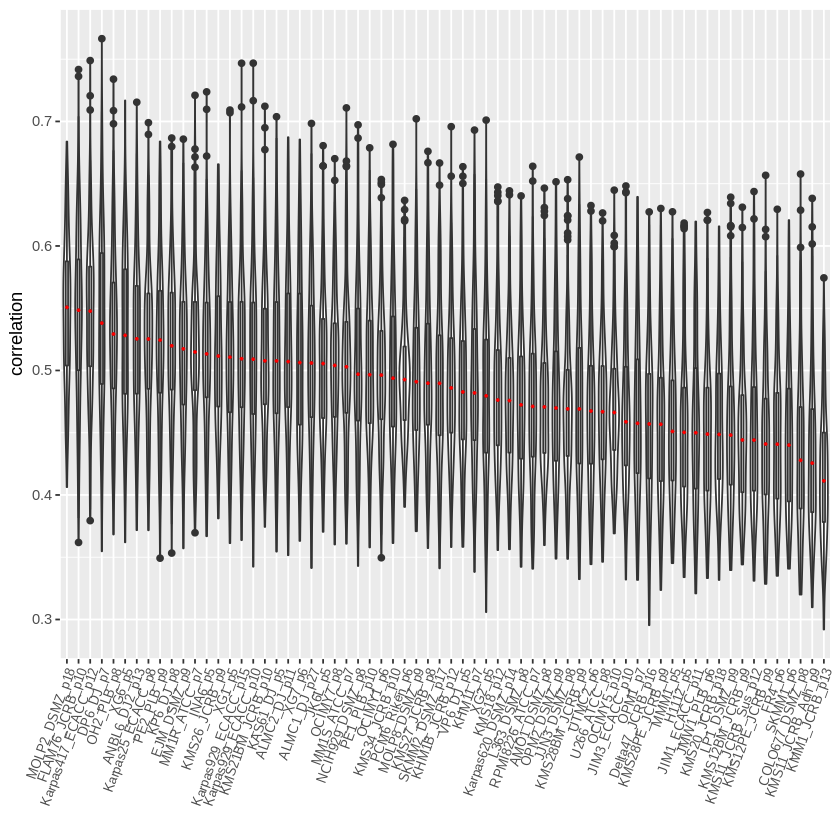

In [42]:
###### KRAS Mutations #########

KRAS_mut = filter(MM_pat_mut, GENE == "KRAS") %>%
  select(sample, EFFECT, HGVS_P, FEATURE) %>%
  filter(EFFECT == "missense_variant") %>%
  mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  filter(position %in% c(12, 13, 61))


MM_pat_mut_KRAS = unique(KRAS_mut$sample)
length(MM_pat_mut_KRAS)
keep_KRAS = colnames(MM_patients) %in% MM_pat_mut_KRAS
MM_patients_KRAS = MM_patients[,keep_KRAS]
MM_combined_KRAS = cbind(MM_cell_line, MM_patients_KRAS)
MM_combined_KRAS.filtered = MM_combined_KRAS[keep,]
MM_combined_KRAS.filtered = MM_combined_KRAS.filtered[keepi,]
MM_combined_KRAS.filtered = MM_combined_KRAS.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_KRAS.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_KRAS.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_KRAS)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 235

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

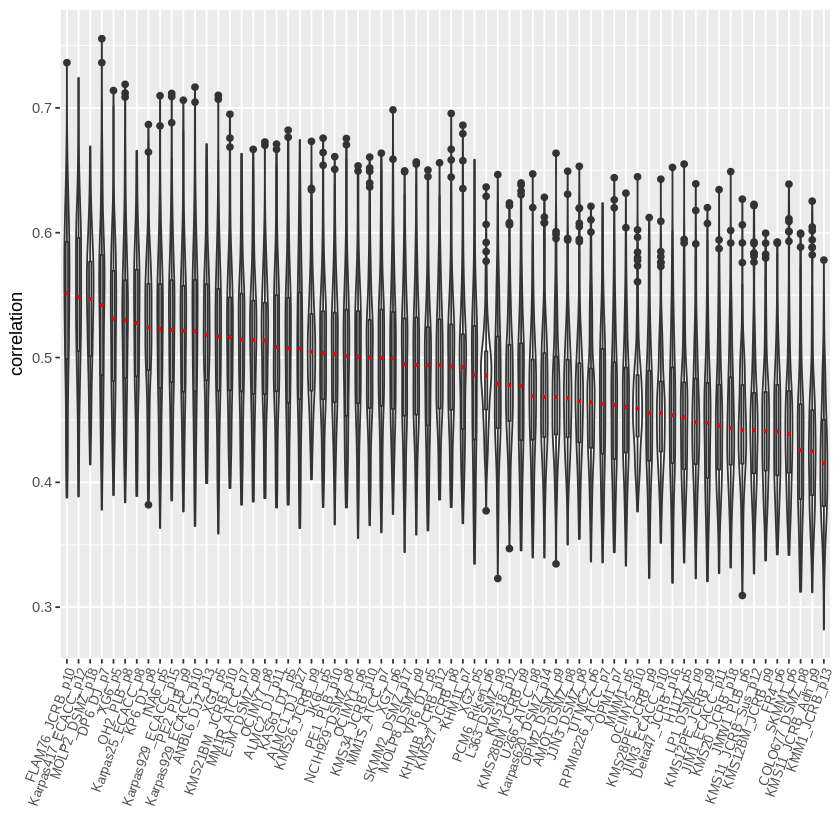

In [43]:
#### NRAS #####

NRAS_mut = filter(MM_pat_mut, GENE == "NRAS") %>%
  select(sample, EFFECT, HGVS_P, FEATURE) %>%
  filter(EFFECT == "missense_variant") %>%
  mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  filter(position %in% c(12, 13, 61))

MM_pat_mut_NRAS = unique(NRAS_mut$sample)
length(MM_pat_mut_NRAS)
keep_NRAS = colnames(MM_patients) %in% MM_pat_mut_NRAS
MM_patients_NRAS = MM_patients[,keep_NRAS]
MM_combined_NRAS = cbind(MM_cell_line, MM_patients_NRAS)
MM_combined_NRAS.filtered = MM_combined_NRAS[keep,]
MM_combined_NRAS.filtered = MM_combined_NRAS.filtered[keepi,]
MM_combined_NRAS.filtered = MM_combined_NRAS.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_NRAS.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_NRAS.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_NRAS)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 41

converting counts to integer mode
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

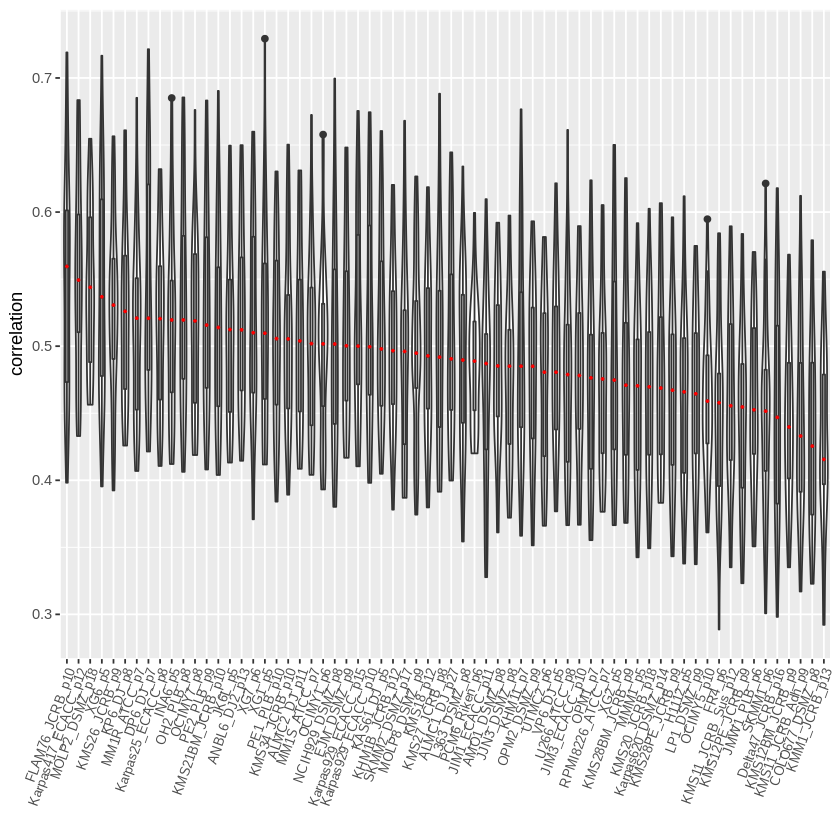

In [44]:
BRAF_mut = filter(MM_pat_mut, GENE == "BRAF") %>%
  select(sample, EFFECT, HGVS_P, FEATURE) %>%
  filter(EFFECT == "missense_variant") %>%
  mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  filter(position %in% c(600))

MM_pat_mut_BRAF = unique(BRAF_mut$sample)
length(MM_pat_mut_BRAF)
keep_BRAF = colnames(MM_patients) %in% MM_pat_mut_BRAF
MM_patients_BRAF = MM_patients[,keep_BRAF]
MM_combined_BRAF = cbind(MM_cell_line, MM_patients_BRAF)
MM_combined_BRAF.filtered = MM_combined_BRAF[keep,]
MM_combined_BRAF.filtered = MM_combined_BRAF.filtered[keepi,]
MM_combined_BRAF.filtered = MM_combined_BRAF.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_BRAF.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_BRAF.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_BRAF)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 92

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

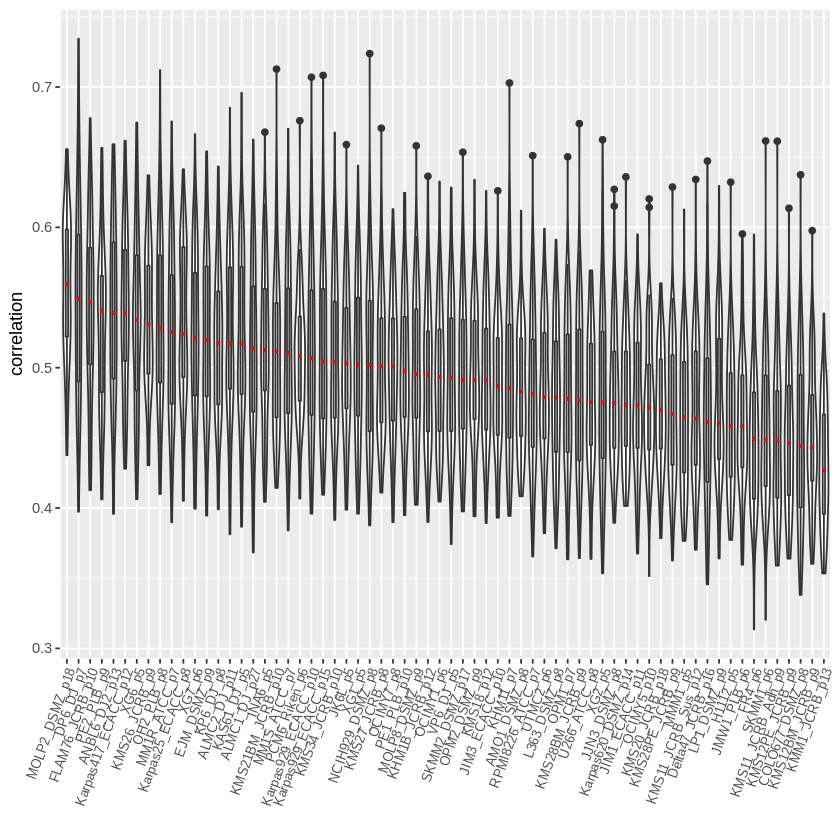

In [45]:
DIS3_mut = filter(MM_pat_mut, EFFECT %in% c("missense_variant",
                                         "frameshift_variant",
                                         "stop_gained",
                                         "start_lost",
                                         "stop_lost",
                                         "missense_variant&splice_region_variant",
                                         "frameshift_variant&splice_region_variant",
                                         "disruptive_inframe_deletion",
                                         "stop_gained&splice_region_variant",
                                         "frameshift_variant&stop_gained",
                                         "frameshift_variant&splice_acceptor_variant&splice_region_variant&intron_variant",
                                         "frameshift_variant&splice_donor_variant&splice_region_variant&intron_variant",
                                         "splice_donor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&splice_region_variant",
                                         "disruptive_inframe_insertion",
                                         "stop_gained&disruptive_inframe_deletion",
                                         "frameshift_variant&start_lost",
                                         "stop_gained&disruptive_inframe_insertion",
                                         "disruptive_inframe_deletion&splice_region_variant",
                                         "disruptive_inframe_insertion&splice_region_variant",
                                         "start_lost&splice_region_variant",
                                         "start_lost&inframe_deletion",
                                         "frameshift_variant&stop_lost",
                                         "splice_acceptor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&inframe_deletion")) %>%
  filter(str_extract(sample, "_[0-9]_") == "_1_")  %>%
  filter(GENE == 'DIS3')

MM_pat_mut_DIS3 = unique(DIS3_mut$sample)
length(MM_pat_mut_DIS3)
keep_DIS3 = colnames(MM_patients) %in% MM_pat_mut_DIS3
MM_patients_DIS3 = MM_patients[,keep_DIS3]
MM_combined_DIS3 = cbind(MM_cell_line, MM_patients_DIS3)
MM_combined_DIS3.filtered = MM_combined_DIS3[keep,]
MM_combined_DIS3.filtered = MM_combined_DIS3.filtered[keepi,]
MM_combined_DIS3.filtered = MM_combined_DIS3.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_DIS3.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_DIS3.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_DIS3)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 88

converting counts to integer mode
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

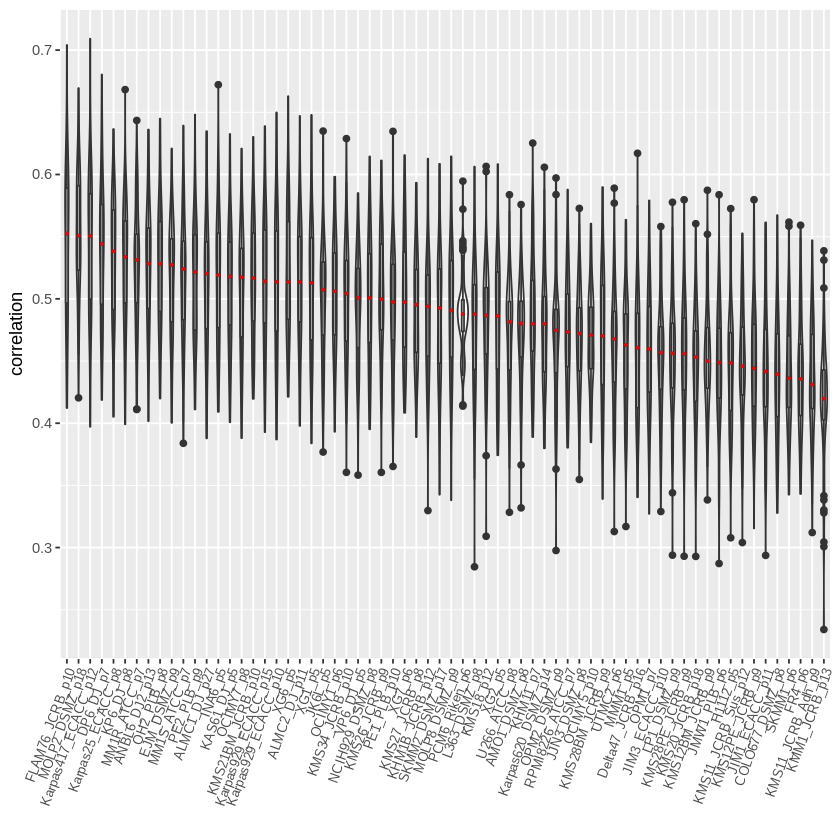

In [46]:
FAM46C_mut = filter(MM_pat_mut, EFFECT %in% c("missense_variant",
                                         "frameshift_variant",
                                         "stop_gained",
                                         "start_lost",
                                         "stop_lost",
                                         "missense_variant&splice_region_variant",
                                         "frameshift_variant&splice_region_variant",
                                         "disruptive_inframe_deletion",
                                         "stop_gained&splice_region_variant",
                                         "frameshift_variant&stop_gained",
                                         "frameshift_variant&splice_acceptor_variant&splice_region_variant&intron_variant",
                                         "frameshift_variant&splice_donor_variant&splice_region_variant&intron_variant",
                                         "splice_donor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&splice_region_variant",
                                         "disruptive_inframe_insertion",
                                         "stop_gained&disruptive_inframe_deletion",
                                         "frameshift_variant&start_lost",
                                         "stop_gained&disruptive_inframe_insertion",
                                         "disruptive_inframe_deletion&splice_region_variant",
                                         "disruptive_inframe_insertion&splice_region_variant",
                                         "start_lost&splice_region_variant",
                                         "start_lost&inframe_deletion",
                                         "frameshift_variant&stop_lost",
                                         "splice_acceptor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&inframe_deletion")) %>%
  filter(str_extract(sample, "_[0-9]_") == "_1_")  %>%
  filter(GENE == 'FAM46C')

MM_pat_mut_FAM46C = unique(FAM46C_mut$sample)
length(MM_pat_mut_FAM46C)
keep_FAM46C = colnames(MM_patients) %in% MM_pat_mut_FAM46C
MM_patients_FAM46C = MM_patients[,keep_FAM46C]
MM_combined_FAM46C = cbind(MM_cell_line, MM_patients_FAM46C)
MM_combined_FAM46C.filtered = MM_combined_FAM46C[keep,]
MM_combined_FAM46C.filtered = MM_combined_FAM46C.filtered[keepi,]
MM_combined_FAM46C.filtered = MM_combined_FAM46C.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_FAM46C.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_FAM46C.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_FAM46C)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

converting counts to integer mode


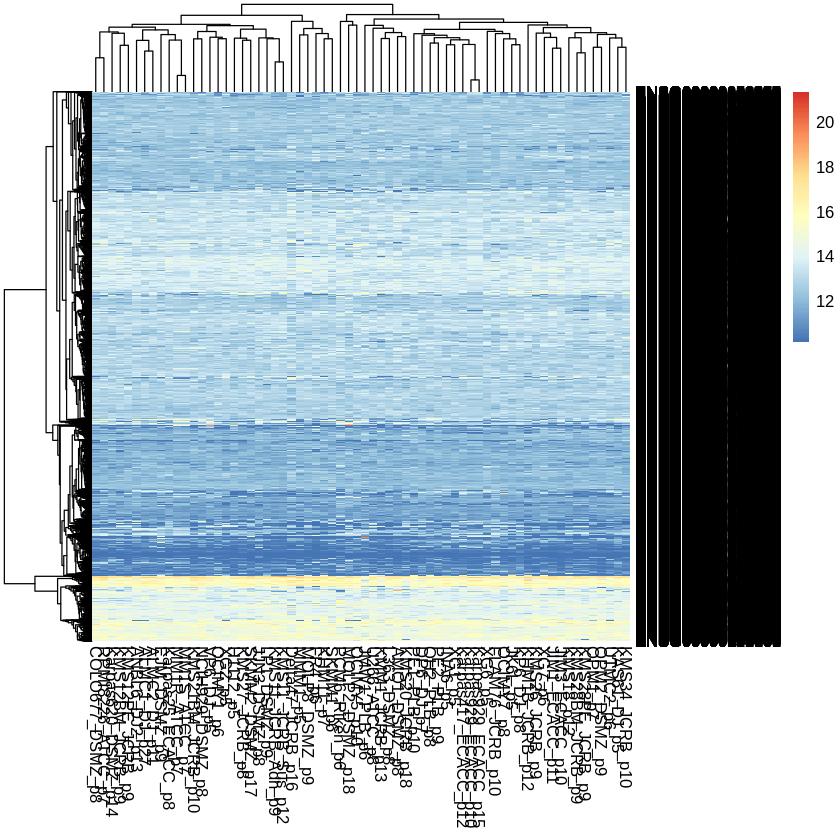

In [47]:
MM_cell_line_2 = MM_cell_line[keep, ]
MM_cell_line_2 = MM_cell_line_2[keepi, ]
MM_cell_line_2 = MM_cell_line_2[,-1]

setv = vst(as.matrix(round(MM_cell_line_2)))

pheatmap(setv)

converting counts to integer mode
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.


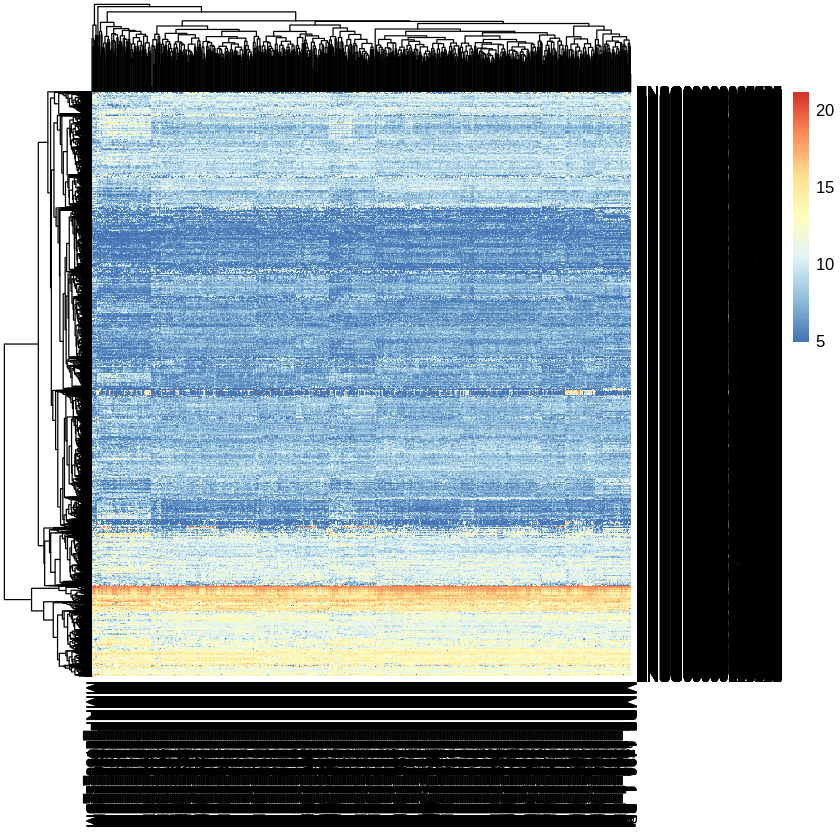

In [48]:
MM_patients_2 = MM_patients[keep, ]
MM_patients_2 = MM_patients_2[keepi, ]

setv = vst(as.matrix(round(MM_patients_2)))

pheatmap(setv)

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000005 TNMD         1            0            0            0         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000005    1               0                0         0       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
                FLAM76_JCRB_p10 ⋯ RPMI8226_ATCC_p7 SKMM1_p6 SKMM2_DSMZ_p17
ENSG00000000003    4            ⋯    2                0        0          
ENSG00000000005    0            ⋯    0                1        0          
ENSG00000000419 1388            ⋯ 2694             1247     3263          
ENSG00000000457 1013            ⋯  665              994      497          
ENSG00000000460 1507            ⋯ 1472             1517     1346          
ENSG00000000938    2            ⋯    0              125      777          
                U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5 XG6_p5 XG7_p6
ENSG00000000003    0            0        0         0      0      2     114 
ENSG00000000005    0            0        0         0      0      0       0 
ENSG00000000419 3044         3108     4538      7336   4430   9279   13828 
ENSG00000000457 1611         1603     1375      1426    893   1540    1660 
ENSG00000000460 2068         3128     1850      2522   2320    793     689 
ENSG00000000938   50         1890     2315      1514      5   3776     847

[1] 48637

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000001036  157         2238         5620          4786        
ENSG00000001167 4072         4599         5967          3929        
ENSG00000001461 3219         7702         5276          6154        
ENSG00000001497 6102         4894         4204          6809        
ENSG00000001561 4226         4260         2735          1179        
ENSG00000001629 7506         7626         5787         12231        
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000001036 7363            2392              8351     2484       
ENSG00000001167 4719            1904              3588     1723       
ENSG00000001461 3652            3768              4191     4368       
ENSG00000001497 9480            2995              5036     2438       
ENSG00000001561  721            1472              4159      980       
ENSG00000001629 8093            2304             10061     5778       
                FLAM76_JCRB_p10 FR4_p6 ⋯ RPMI8226_ATCC_p7 SKMM1_p6
ENSG00000001036 1835            3398   ⋯ 3815             2522    
ENSG00000001167 2638            2690   ⋯ 2279             3059    
ENSG00000001461 4302            1346   ⋯ 3643             3135    
ENSG00000001497 4184            6052   ⋯ 5430             2895    
ENSG00000001561 1475             573   ⋯  972             1451    
ENSG00000001629 5149            2275   ⋯ 5075             4762    
                SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5
ENSG00000001036 2088           2014         5524      2500      8384  21884 
ENSG00000001167 3184           1836         5075      5207      3393   5177 
ENSG00000001461 5175           4104         6448      1320      3882   3409 
ENSG00000001497 4860           3089         4714      5278      5753   8419 
ENSG00000001561 1700           4649         5343      3961      3556   2529 
ENSG00000001629 5090           9417         5390     16667     11359  10704 
                XG6_p5 XG7_p6
ENSG00000001036 9599   4732  
ENSG00000001167 3198   4326  
ENSG00000001461 5562   5555  
ENSG00000001497 3841   3385  
ENSG00000001561 3139   8682  
ENSG00000001629 6813   8232

[1] 4998

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000001036  157         2238         5620          4786        
ENSG00000001167 4072         4599         5967          3929        
ENSG00000001461 3219         7702         5276          6154        
ENSG00000001497 6102         4894         4204          6809        
ENSG00000001561 4226         4260         2735          1179        
ENSG00000001629 7506         7626         5787         12231        
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000001036 7363            2392              8351     2484       
ENSG00000001167 4719            1904              3588     1723       
ENSG00000001461 3652            3768              4191     4368       
ENSG00000001497 9480            2995              5036     2438       
ENSG00000001561  721            1472              4159      980       
ENSG00000001629 8093            2304             10061     5778       
                FLAM76_JCRB_p10 FR4_p6 ⋯ RPMI8226_ATCC_p7 SKMM1_p6
ENSG00000001036 1835            3398   ⋯ 3815             2522    
ENSG00000001167 2638            2690   ⋯ 2279             3059    
ENSG00000001461 4302            1346   ⋯ 3643             3135    
ENSG00000001497 4184            6052   ⋯ 5430             2895    
ENSG00000001561 1475             573   ⋯  972             1451    
ENSG00000001629 5149            2275   ⋯ 5075             4762    
                SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5
ENSG00000001036 2088           2014         5524      2500      8384  21884 
ENSG00000001167 3184           1836         5075      5207      3393   5177 
ENSG00000001461 5175           4104         6448      1320      3882   3409 
ENSG00000001497 4860           3089         4714      5278      5753   8419 
ENSG00000001561 1700           4649         5343      3961      3556   2529 
ENSG00000001629 5090           9417         5390     16667     11359  10704 
                XG6_p5 XG7_p6
ENSG00000001036 9599   4732  
ENSG00000001167 3198   4326  
ENSG00000001461 5562   5555  
ENSG00000001497 3841   3385  
ENSG00000001561 3139   8682  
ENSG00000001629 6813   8232

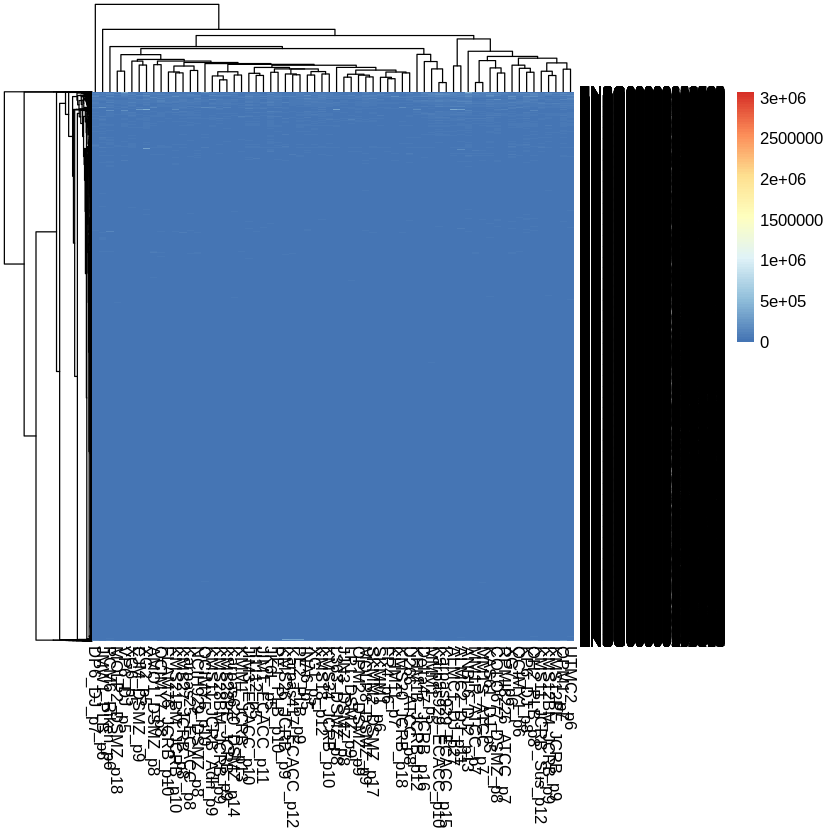

In [49]:
head(MM_cell_line)
length(MM_cell_line[,1])
MM_cell_line_2 = MM_cell_line[keep, ]
MM_cell_line_2 = MM_cell_line_2[keepi, ]
MM_cell_line_2 = MM_cell_line_2[,-1]
head(MM_cell_line_2)
length(MM_cell_line_2[,1])
cal_z_score <- function(x){
  (x - mean(x)) / sd(x)
}
head(MM_cell_line_2)
#data_subset_norm <- t(apply(MM_cell_line_2, 1, cal_z_score))
pheatmap(MM_cell_line_2)